# Basics in Matplotlib

Today we will go through graph plotting in Python. In this tutorial, we will be using a famous libary Matplotlib to demostrate how graph plotting is done in jupyter. Matplotlib is a common plotting library which generates 2D graphs and works well in both jupyter and IPython. The graph is in good quality which can be included into technical report and thesis. Matplotlib is designed to be simple and you can plot one graph with one single command.

In [83]:
import matplotlib.pyplot as plt

## Line Chart

Now let's try a simple line chart.

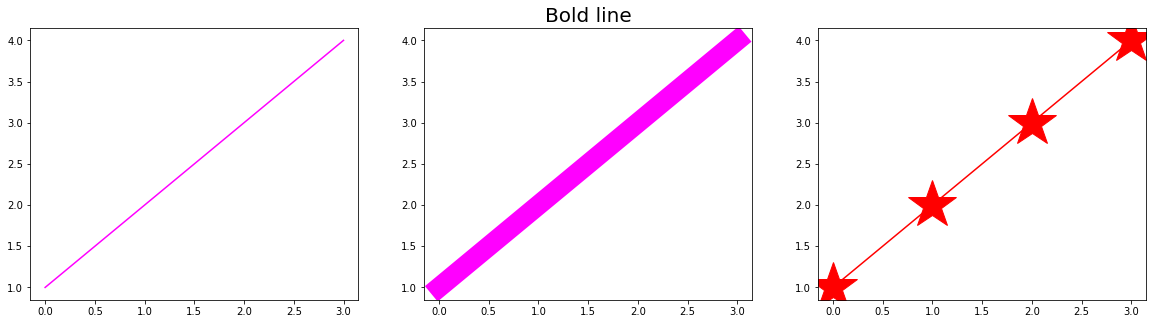

In [100]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.subplot(1, 3, 1)
plt.plot([1, 2, 3, 4], c='#FF00FF')
plt.subplot(1, 3, 2)
plt.title("Bold line", fontsize=20)
plt.plot([1, 2, 3, 4], linewidth=20, c='#FF00FF')
plt.subplot(1, 3, 3)
plt.plot([1, 2, 3, 4], '*-', markersize=50, c='r')

Now let's more different kinds of graphs.

1. Bar
2. Histogram
3. Pie
4. Scatter

# Example 1: Map Visualization
In this example, we would do a simple map visualization of Hong Kong. We get the geojson data from https://data.gov.hk/en-data/dataset/hk-had-json1-hong-kong-administrative-boundaries/resource/d2a89ff1-72d7-4523-a7de-74a57ad3e14b.

# Pre-requisite
The following packages are required.

```
geopandas
shapely
```

Now let's read the file.

In [66]:
import geopandas as gpd
import pandas as pd
hkg = gpd.read_file('hkg.geojson')
del hkg['Administrative District Boundary of Hong Kong']
hkg

,地區號碼,District,地區,geometry
0,A,Central & Western,中西區,"POLYGON ((114.14951 22.29748, 114.10987 22.297..."
1,B,Wan Chai,灣仔,"POLYGON ((114.19771 22.2579, 114.19778 22.2580..."
2,C,Eastern,東區,"POLYGON ((114.21939 22.29568, 114.21087 22.300..."
3,D,Southern,南區,"POLYGON ((114.16338 22.25882, 114.16305 22.258..."
4,E,Yau Tsim Mong,油尖旺,"POLYGON ((114.17448 22.32665, 114.17417 22.326..."
5,F,Sham Shui Po,深水埗,"POLYGON ((114.17273 22.34646, 114.17258 22.346..."
6,G,Kowloon City,九龍城,"POLYGON ((114.17946 22.34902, 114.179 22.34908..."
7,H,Wong Tai Sin,黃大仙,"POLYGON ((114.22403 22.33452, 114.22112 22.353..."
8,J,Kwun Tong,觀塘,"POLYGON ((114.22403 22.33452, 114.22397 22.334..."
9,K,Tsuen Wan,荃灣,"POLYGON ((114.16919 22.41293, 114.16148 22.413..."


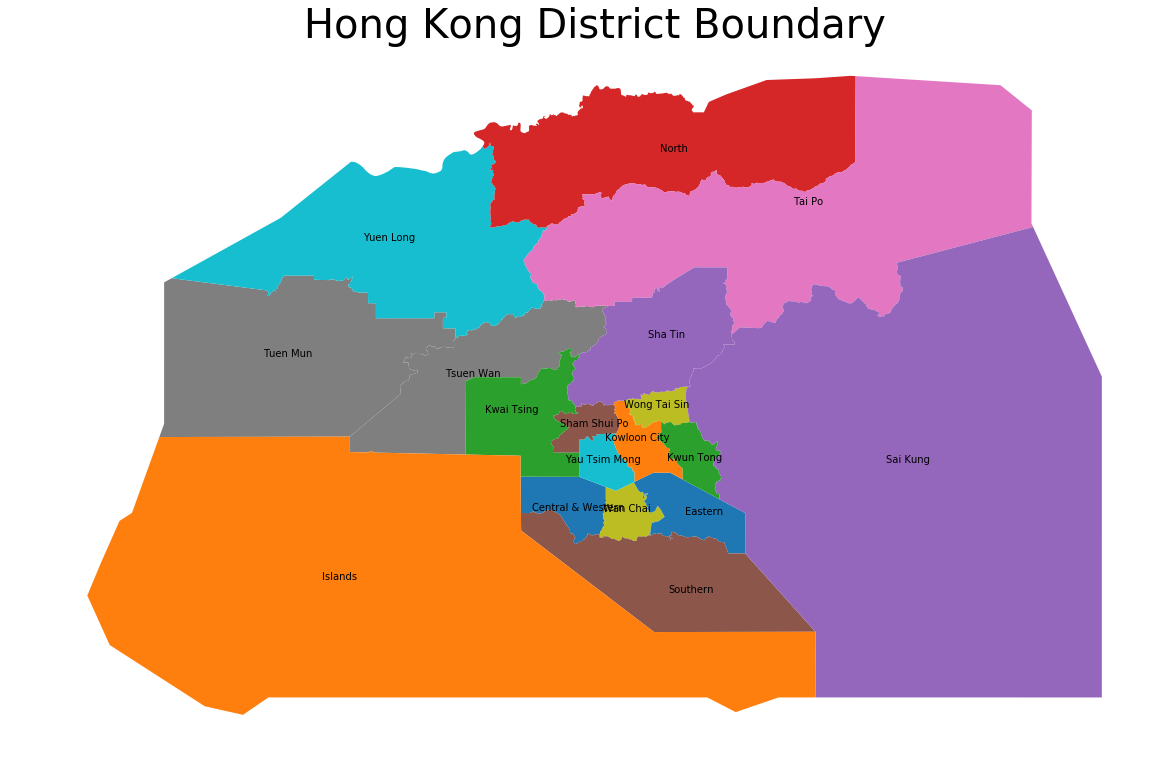

In [67]:
%matplotlib inline
import matplotlib as plt
ax = hkg.plot(column='District',  figsize=(20, 20))
ax.axis('off')
ax.set_title('Hong Kong District Boundary', fontsize=40)
for idx, row in hkg.iterrows():
    pt = row['geometry'].representative_point()
    ax.annotate(s=row['District'], xy=(pt.x, pt.y),
                 horizontalalignment='center', fontsize=10)

In [75]:
! pip install pySAL

    100% |████████████████████████████████| 17.8MB 33kB/s  eta 0:00:01    94% |██████████████████████████████▎ | 16.9MB 29.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for pySAL ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/fa/dd/19/2665a24ef25064d2717f2e04aa173cd7876298ef4578bf9777
Successfully built pySAL
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
population = pd.read_csv('Population.csv')
hkg2 = hkg.merge(population, on='District')
del hkg2['Chinese']
hkg2.sort_values(by='Population', ascending=False)

,地區號碼,District,地區,geometry,Population,Area,Density
14,R,Sha Tin,沙田,"POLYGON ((114.25245 22.3936, 114.25246 22.394,...",648200,68.71,9433.85
7,J,Kwun Tong,觀塘,"POLYGON ((114.22403 22.33452, 114.22397 22.334...",641100,11.27,56779.05
10,M,Yuen Long,元朗,"POLYGON ((114.1279 22.46651, 114.12657 22.4661...",607200,138.46,4297.99
1,C,Eastern,東區,"POLYGON ((114.21939 22.29568, 114.21087 22.300...",574500,18.56,31217.67
15,S,Kwai Tsing,葵青,"POLYGON ((114.14901 22.38028, 114.14753 22.378...",507100,23.34,21503.86
9,L,Tuen Mun,屯門,"POLYGON ((114.06597 22.39181, 114.06581 22.397...",495900,82.89,5889.38
13,Q,Sai Kung,西貢,"POLYGON ((114.30925 22.14848, 114.50246 22.148...",448600,129.65,3460.08
6,H,Wong Tai Sin,黃大仙,"POLYGON ((114.22403 22.33452, 114.22112 22.353...",426200,9.30,45645.16
5,G,Kowloon City,九龍城,"POLYGON ((114.17946 22.34902, 114.179 22.34908...",405400,10.02,40194.70
4,F,Sham Shui Po,深水埗,"POLYGON ((114.17273 22.34646, 114.17258 22.346...",390600,9.35,41529.41


Note: Please install `pySAL` in order to use `schema` when plotting.

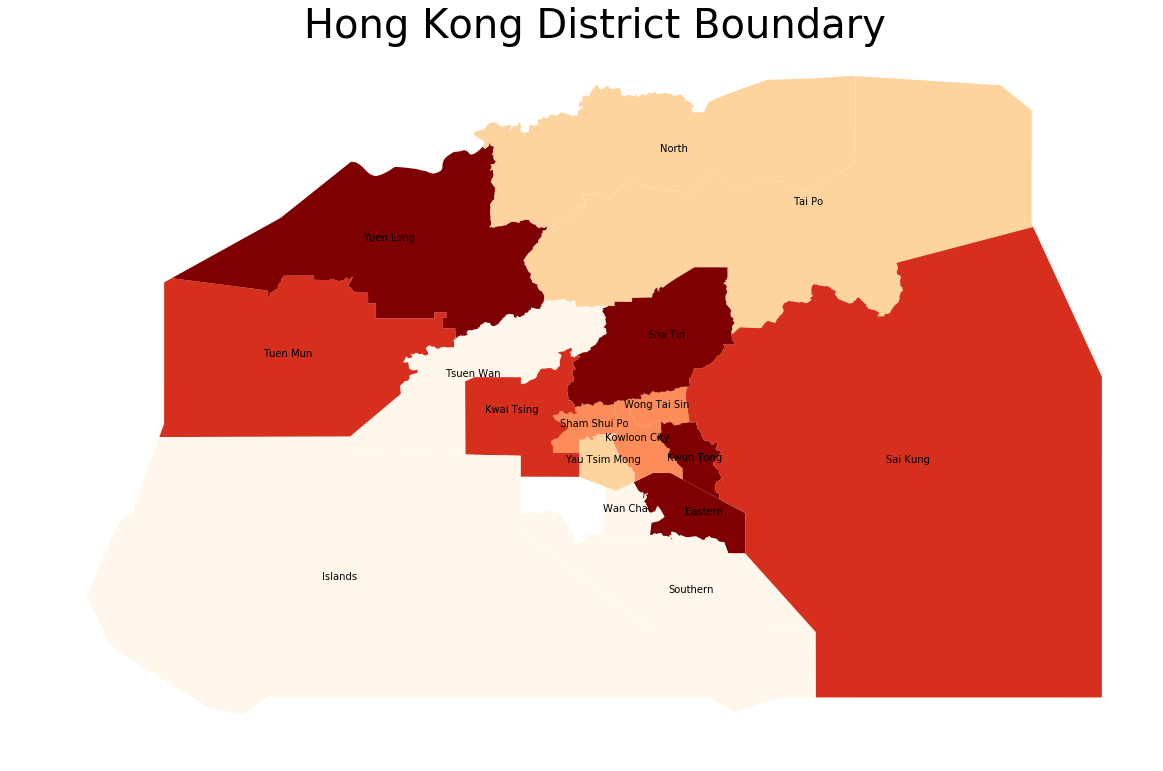

In [78]:
%matplotlib inline
import matplotlib as plt
ax = hkg2.plot(column='Population',  figsize=(20, 20), cmap='OrRd', scheme='quantiles')
ax.axis('off')
ax.set_title('Hong Kong District Boundary', fontsize=40)
for idx, row in hkg2.iterrows():
    pt = row['geometry'].representative_point()
    ax.annotate(s=row['District'], xy=(pt.x, pt.y),
                 horizontalalignment='center', fontsize=10)

# Example 2: Wordcloud

In here, we will use WordCloud library at https://github.com/amueller/word_cloud. World cloud or tag cloud is a common text visualization nowadays. It can show most common or most important words in a website, blog, articles etc.

For example, this is the word cloud of Wikimedia-l generated by IBM word cloud generator.